# Imports

The following imports allowed us to export the data set as well as process the data and use distinct regression algorithms established within SciKitLearn.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor

# Upload Data

The data set was selected by giving high importance to the amount of values per column (284,315) as well as the amount of columns that we could analyse and include in our models (30). We selected data with high levels of completion to maximize our final analysis. The selected data set contains credit card fraud data and private, confidential information and therefore the columns are represented by standard variable names (V1-V28) which allow us to analyse the data without bias and get results based purely on statistical significance.

In [0]:
url = 'https://people.eecs.ku.edu/~m139t745/creditcard.csv'
df = pd.read_csv(url)

In [0]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preparation

In this section, we split the data into training and testing sets. 70% of the original data set is used as training data and the remaining 30% is used as testing data. Fraudulent transactions are dropped from the set since the amounts spent in those transactions may not be indicitive of true consumer credit card spending behaviors.

In [0]:
# seed RNG for reproducable results
np.random.seed(1)

#drop fraudulent transactions
df = df.drop(df[df.Class == 1].index)

# split original data set into training and testing data sets
mask = np.random.rand(len(df)) < 0.7
df_train = df[mask]
df_test = df[~mask]

input_columns = range(1, 29)
output_column = 29

# get relevant training data
training_inputs = df_train.iloc[:, input_columns]
training_output = df_train.iloc[:, output_column]

# get relevant testing data
testing_inputs = df_test.iloc[:, input_columns]
testing_output = df_test.iloc[:, output_column]

# Feature Analysis

Heatmaps were used to get a better understanding of the relationships between the features and the output values (Amount). A heatmap shows the correlation values between various components. A higher absolute value means there is a stronger correlation between the two components.

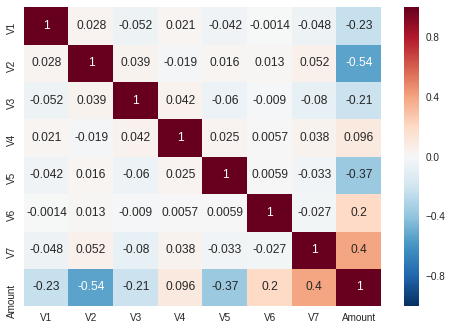

In [0]:
corr1 = df_train[['V1','V2','V3','V4','V5','V6','V7','Amount']].corr()
sns.heatmap(corr1, annot=True)

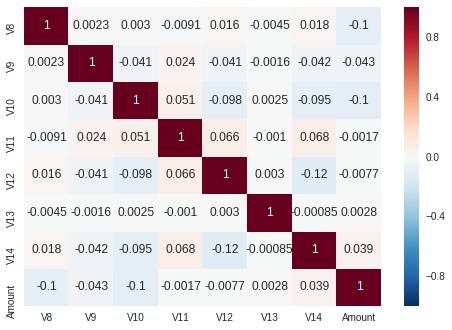

In [0]:
corr2 = df_train[['V8','V9','V10','V11','V12','V13','V14','Amount']].corr()
sns.heatmap(corr2, annot=True)

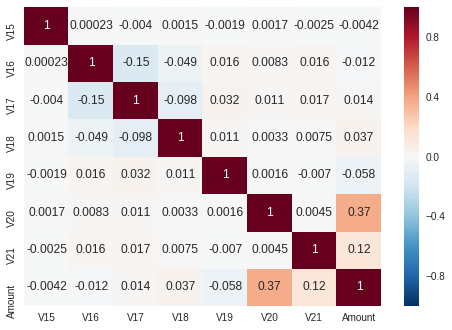

In [0]:
corr3 = df_train[['V15','V16','V17','V18','V19','V20','V21','Amount']].corr()
sns.heatmap(corr3, annot=True)

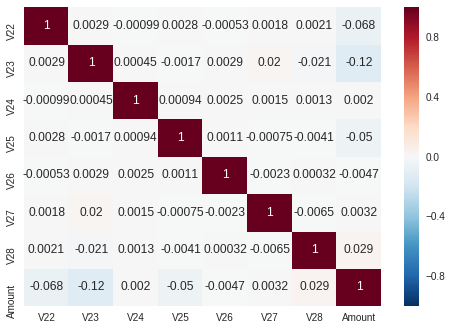

In [0]:
corr4 = df_train[['V22','V23','V24','V25','V26','V27','V28','Amount']].corr()
sns.heatmap(corr4, annot=True)

From observing the heatmaps, some of the most salient features appear to be V1, V2, V3, V5, V6, V7, V20, V21, and V23. We expect to see many of these features included in the regression models.

# Linear Regression

We can use the recursive feature elimination function in SciKitLearn to produce the best linear models for every number of features. These models contain the same features that the correlation heatmaps indicated were salient. As expected, the accuracy of the models increases as we add more features, up to a point. Around 14 features, additional features provide only marginal returns while further complicating the model.

In [0]:
# for every number of inputs (1 to 28)
for i in range(len(input_columns)):
	
	# find the most accurate model with i+1 features
	best_linear_model = RFE(LinearRegression(), i + 1).fit(training_inputs, training_output)
    
	# print number of features used
	print(i + 1, end='')

	# test the model
	predicted_output = best_linear_model.predict(testing_inputs)
	
	# print results
	r_squared = round(r2_score(testing_output, predicted_output), 4)
	rmse = round(np.sqrt(mean_squared_error(testing_output, predicted_output)), 2)
	mae = round(mean_absolute_error(testing_output, predicted_output), 2)
	print('\tr2:', r_squared, '\trmse:', rmse, '\tmae:', mae, end=' ')
	
	if i < 6:
		print('\tfeatures used: ', end='')
		salient_features = best_linear_model.get_support()
		for j in range(len(salient_features)):
			if salient_features[j]:
				print(testing_inputs.columns.values[j], end=' ')
                
	print('') # newline

1	r2: 0.0758 	rmse: 252.18 	mae: 99.12 	features used: V20 
2	r2: 0.2908 	rmse: 220.91 	mae: 112.07 	features used: V7 V20 
3	r2: 0.5865 	rmse: 168.69 	mae: 79.73 	features used: V2 V7 V20 
4	r2: 0.7323 	rmse: 135.71 	mae: 75.57 	features used: V2 V5 V7 V20 
5	r2: 0.7455 	rmse: 132.34 	mae: 75.35 	features used: V2 V5 V7 V20 V23 
6	r2: 0.7981 	rmse: 117.86 	mae: 63.75 	features used: V2 V5 V6 V7 V20 V23 
7	r2: 0.8047 	rmse: 115.91 	mae: 62.36 
8	r2: 0.8385 	rmse: 105.43 	mae: 59.41 
9	r2: 0.8837 	rmse: 89.46 	mae: 43.03 
10	r2: 0.8873 	rmse: 88.06 	mae: 40.38 
11	r2: 0.8963 	rmse: 84.46 	mae: 38.77 
12	r2: 0.8982 	rmse: 83.68 	mae: 38.8 
13	r2: 0.9084 	rmse: 79.4 	mae: 37.39 
14	r2: 0.9178 	rmse: 75.22 	mae: 31.03 
15	r2: 0.9207 	rmse: 73.89 	mae: 27.87 
16	r2: 0.9221 	rmse: 73.21 	mae: 28.47 
17	r2: 0.9241 	rmse: 72.29 	mae: 26.6 
18	r2: 0.9251 	rmse: 71.77 	mae: 25.32 
19	r2: 0.925 	rmse: 71.82 	mae: 25.4 
20	r2: 0.926 	rmse: 71.34 	mae: 24.11 
21	r2: 0.9261 	rmse: 71.3 	mae: 23.95 


# Lasso Regression

The Lasso Regression model is highly similar to the linear regression model but it adds to the analysis L1 regularization.

In [0]:
for i in range(len(input_columns)):
	
	# find the most accurate model with i+1 features
	best_lasso_model = RFE(Lasso(alpha=2), i + 1).fit(training_inputs, training_output)
    
	# print number of features used
	print(i + 1, end='')

	# test the model
	predicted_output = best_lasso_model.predict(testing_inputs)
	
	# print results
	r_squared = round(r2_score(testing_output, predicted_output), 4)
	rmse = round(np.sqrt(mean_squared_error(testing_output, predicted_output)), 2)
	mae = round(mean_absolute_error(testing_output, predicted_output), 2)
	print('\tr2:', r_squared, '\trmse:', rmse, '\tmae:', mae, end=' ')
	
	if i < 6:
		print('\tfeatures used: ', end='')
		salient_features = best_lasso_model.get_support()
		for j in range(len(salient_features)):
			if salient_features[j]:
				print(testing_inputs.columns.values[j], end=' ')
                
	print('') # newline

1	r2: 0.0771 	rmse: 252.01 	mae: 99.08 	features used: V20 
2	r2: 0.2903 	rmse: 220.99 	mae: 111.5 	features used: V7 V20 
3	r2: 0.586 	rmse: 168.79 	mae: 79.57 	features used: V2 V7 V20 
4	r2: 0.7313 	rmse: 135.98 	mae: 75.31 	features used: V2 V5 V7 V20 
5	r2: 0.744 	rmse: 132.73 	mae: 75.05 	features used: V2 V5 V7 V20 V23 
6	r2: 0.7965 	rmse: 118.33 	mae: 63.6 	features used: V2 V5 V6 V7 V20 V23 
7	r2: 0.8033 	rmse: 116.33 	mae: 62.21 
8	r2: 0.837 	rmse: 105.91 	mae: 59.24 
9	r2: 0.8824 	rmse: 89.96 	mae: 42.57 
10	r2: 0.8914 	rmse: 86.47 	mae: 40.66 
11	r2: 0.9012 	rmse: 82.45 	mae: 39.32 
12	r2: 0.9048 	rmse: 80.93 	mae: 37.58 
13	r2: 0.9142 	rmse: 76.83 	mae: 32.17 
14	r2: 0.916 	rmse: 76.05 	mae: 31.11 
15	r2: 0.9187 	rmse: 74.79 	mae: 28.39 
16	r2: 0.9206 	rmse: 73.89 	mae: 26.79 
17	r2: 0.9216 	rmse: 73.44 	mae: 25.71 
18	r2: 0.9226 	rmse: 72.99 	mae: 24.68 
19	r2: 0.9228 	rmse: 72.88 	mae: 24.75 
20	r2: 0.9228 	rmse: 72.88 	mae: 24.75 
21	r2: 0.9228 	rmse: 72.88 	mae: 24.75 

In [0]:
best_lasso_model = LassoCV(cv=100, random_state=0).fit(training_inputs, training_output)
	
# test this model
predicted_output = best_lasso_model.predict(testing_inputs)
	
# print results
r_squared = round(r2_score(testing_output, predicted_output), 4)
rmse = round(np.sqrt(mean_squared_error(testing_output, predicted_output)), 2)
mae = round(mean_absolute_error(testing_output, predicted_output), 2)
print('r2:', r_squared, '\trmse:', rmse, '\tmae:', mae)

r2: 0.926 	rmse: 71.34 	mae: 23.84


The best lasso model has essentially the same r squared and error values as the best linear model, so we decided to include a more powerful regression algorithm.

# Multi-layer Perceptron

A multi-layer perceptron is a type of neural network that can perform either regression or classification. Here, we train a multi-layer perceptron regressor that iteratively uses backpropagation to assign weights. Although it takes some time to construct, the resulting model is incredibly accurate.

In [0]:
# train model
mlp = MLPRegressor().fit(training_inputs, training_output)

In [0]:
# test model
predicted_output = mlp.predict(testing_inputs)

In [0]:
# print results
mlp_r2 = round(r2_score(testing_output, predicted_output), 4)
mlp_rmse = round(np.sqrt(mean_squared_error(testing_output, predicted_output)), 2)
mlp_mae = round(mean_absolute_error(testing_output, predicted_output), 2)
print('r2:', mlp_r2, '\trmse:', mlp_rmse, '\tmae', mlp_mae)

r2: 0.998 	rmse: 11.65 	mae 3.49
